In [319]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_complete = pd.merge(ride_data,city_data, how="left", on="city")
pyber_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [320]:
urban=pyber_complete[pyber_complete['type']=='Urban']
urban_ride_count=pd.DataFrame(urban.groupby(['city'])[['ride_id']].count())[['ride_id']]
urban_fare=pd.DataFrame(urban.groupby(['city'])[['fare']].mean())[['fare']]
urban_driver_count=urban[['driver_count']]*10

suburban=pyber_complete[pyber_complete['type']=='Suburban']
suburban_ride_count=pd.DataFrame(suburban.groupby(['city'])[['ride_id']].count())[['ride_id']]
suburban_fare=pd.DataFrame(suburban.groupby(['city'])[['fare']].mean())[['fare']]
suburban_driver_count = suburban[['driver_count']]*10

rural=pyber_complete[pyber_complete['type']=='Rural']
rural_ride_count=pd.DataFrame(rural.groupby(['city'])[['ride_id']].count())[['ride_id']]
rural_fare=pd.DataFrame(rural.groupby(['city'])[['fare']].mean())[['fare']]
rural_driver_count = rural[['driver_count']]*10

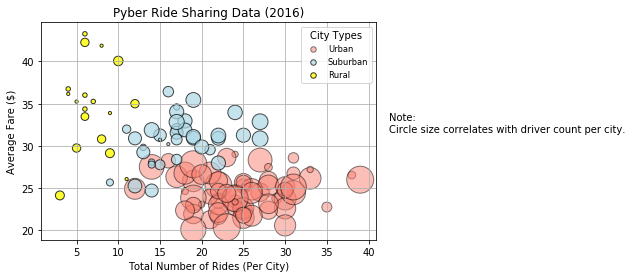

In [300]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
urban=plt.scatter(x=urban_ride_count, y=urban_fare, marker="o", label="Urban", facecolors="salmon",alpha=0.5,  
                  edgecolors="black",s=urban_driver_count)

suburban=plt.scatter(x=suburban_ride_count, y=suburban_fare, marker="o",label="Suburban", facecolors="lightblue",alpha=0.7, 
                     edgecolors="black",s=suburban_driver_count)

rural=plt.scatter(x=rural_ride_count, y=rural_fare, marker="o",label="Rural", facecolors="yellow",alpha=0.8,
                  edgecolors="black",s=rural_driver_count)

# Create a legend for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
legend=plt.legend(handles=[urban, suburban, rural],title="City Types", loc="best", fontsize='small', fancybox=True)
for handle in legend.legendHandles:
    handle.set_sizes([30])
    
# Incorporate a text label regarding circle size
plt.text(0.93, 0.5, 'Note:\nCircle size correlates with driver count per city.', fontsize=10, transform=plt.gcf().transFigure)

plt.grid()
# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016).png",dpi=300, bbox_inches = "tight")

## Total Fares by City Type

In [321]:
# Calculate Type Percents
totalFares=pd.DataFrame(pyber_complete.groupby(['type']).sum())[['fare']]
totalFares['%']=100 * totalFares['fare'] / sum(totalFares['fare'])
totalFares['color']=["yellow", "lightblue", "salmon"]
totalFares

,fare,%,color
type,,,
Rural,4327.93,6.811493,yellow
Suburban,19356.33,30.463872,lightblue
Urban,39854.38,62.724635,salmon


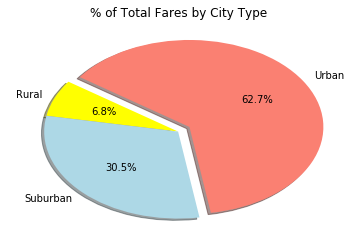

In [318]:
# Build Pie Chart
explode = (0, 0, 0.10)
plt.pie(totalFares['%'],explode=explode,autopct='%1.1f%%',
        labels=totalFares.index,colors=totalFares['color'],
        shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("% of Total Fares by City Type.png",dpi=300)

## Total Rides by City Type

In [303]:
# Calculate Ride Percents
totalrides=pd.DataFrame(pyber_complete.groupby(['type']).count())[['ride_id']]
totalrides['%']=100 * totalrides['ride_id'] / sum(totalrides['ride_id'])
totalrides['color']=["yellow", "lightblue", "salmon"]
totalrides

,ride_id,%,color
type,,,
Rural,125,5.263158,yellow
Suburban,625,26.315789,lightblue
Urban,1625,68.421053,salmon


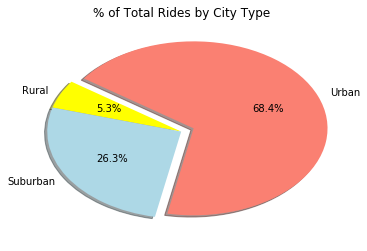

In [304]:
# Build Pie Chart
explode = (0, 0, 0.10)
plt.pie(totalrides['%'],explode=explode,autopct='%1.1f%%',
        labels=totalrides.index,colors=totalrides['color'],
        shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("% of Total Rides by City Type.png",dpi=300)

## Total Drivers by City Type

In [305]:
# Calculate Driver Percents
totalDrivers=pd.DataFrame(city_data.groupby(['type']).sum())[['driver_count']]
totalDrivers['%']=100 * totalDrivers['driver_count'] / sum(totalDrivers['driver_count'])
totalDrivers['color']=["yellow", "lightblue", "salmon"]
totalDrivers

,driver_count,%,color
type,,,
Rural,78,2.623613,yellow
Suburban,490,16.481668,lightblue
Urban,2405,80.894719,salmon


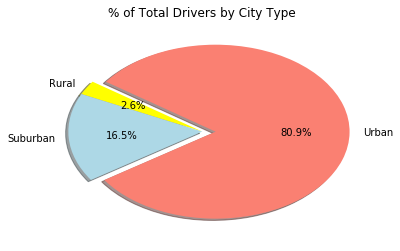

In [297]:
# Build Pie Chart
explode = (0, 0, 0.10)
plt.pie(totalDrivers['%'],explode=explode,autopct='%1.1f%%',
        labels=totalDrivers.index,colors=totalDrivers['color'],
        shadow=True, startangle=145)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png",dpi=300)